In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = pd.read_csv(r"Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dataset.shape

(10000, 14)

#### **El dataset esta constituido de 10000 filas y 14 columnas**

In [10]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### **No hay valores nulos**

## **Eliminamos algunas columnas que no ocuparemos o que tienen valores unicos**

- elimnamos RowNumber,CustomerID y Surname

In [14]:
dataset= dataset.drop(columns = ['RowNumber','CustomerId','Surname'])

In [17]:
dataset.shape

(10000, 11)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## **Convertimos datos categoricos (gografia y genero) a binarios**

In [19]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

#### One hot encoding es una técnica para convertir variables categóricas en una representación binaria. Cada categoría se convierte en una columna separada, con valores de 0 o 1, indicando la presencia o ausencia de esa categoría. Esto permite a los algoritmos de machine learning manejar datos categóricos como números.

In [23]:
"""El código `dataset = pd.get_dummies(data=dataset, drop_first=True)` utiliza la función `get_dummies` de pandas
para convertir variables categóricas en columnas binarias. La opción `drop_first=True` elimina la primera columna creada para 
cada variable categórica, lo que evita la multicolinealidad y reduce la dimensionalidad del dataset."""

dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset = dataset.astype(int)

## **¿Qué es la multicolinealidad?**

La **multicolinealidad** ocurre en un conjunto de datos cuando dos o más variables independientes están altamente correlacionadas entre sí. Esto puede causar problemas en los modelos de regresión y otros algoritmos estadísticos, ya que dificulta la estimación precisa de los coeficientes y puede llevar a interpretaciones erróneas de la relación entre las variables.

### Problemas causados por la multicolinealidad:

1. **Coeficientes Inestables**: Los coeficientes del modelo pueden cambiar drásticamente con pequeños cambios en los datos.
2. **Influencia en la Interpretación**: Hace que sea difícil determinar el impacto individual de cada variable en la variable dependiente.
3. **Reducción de la Precisión**: Puede aumentar el error estándar de los coeficientes, reduciendo la precisión del modelo.

### Cómo se aborda:

- **Eliminación de Variables**: Quitar una o más variables correlacionadas.
- **Transformación de Variables**: Usar técnicas como el análisis de componentes principales (PCA) para combinar variables correlacionadas en componentes independientes.

In [24]:
#recordar que 0 es no y 1 es si
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


#### En la parte de arriba podemos ver que se generaron dos columnas Geography_Germany y Geography_Spain, si ambas columnas aparece 0 quiere decir que la persona es Francesa y la ultima columa Gander_Male indica con 0 si la persona es femenina y 1 si es masculino

## **Hacemos un conteo de todas las personas que salen de la compañia y cuantas permanecen en ella**

<Axes: ylabel='Frequency'>

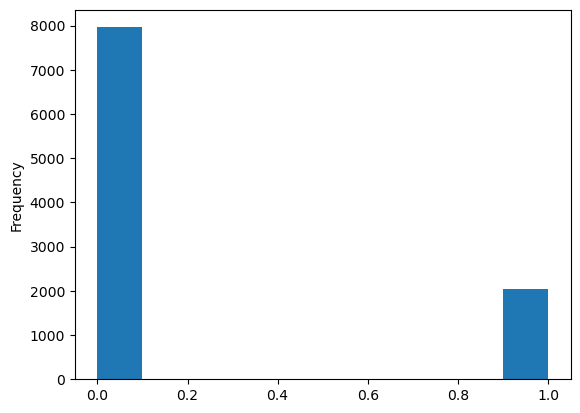

In [25]:
dataset.Exited.plot.hist()

#### Podemos ver que las personas que se quedan estan cerca de los 8000 y las personas que SI abandonan la compañia estan alrededor de las 2000

In [26]:
#comprobamos que en efecto son alrededor de 8000 personas que permanecen en la compañia
(dataset.Exited==0).sum()

7963

In [27]:
#VErificamos que poco mas de 2000 personas abandonaron la compañia
(dataset.Exited==1).sum()

2037

## **Graficamos para ver la correlacion entre todos los valores de las demas columnas con nuestra columna target** 
 creamos una grafica de correlacion

In [28]:
dataset_2=dataset.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited column'}>

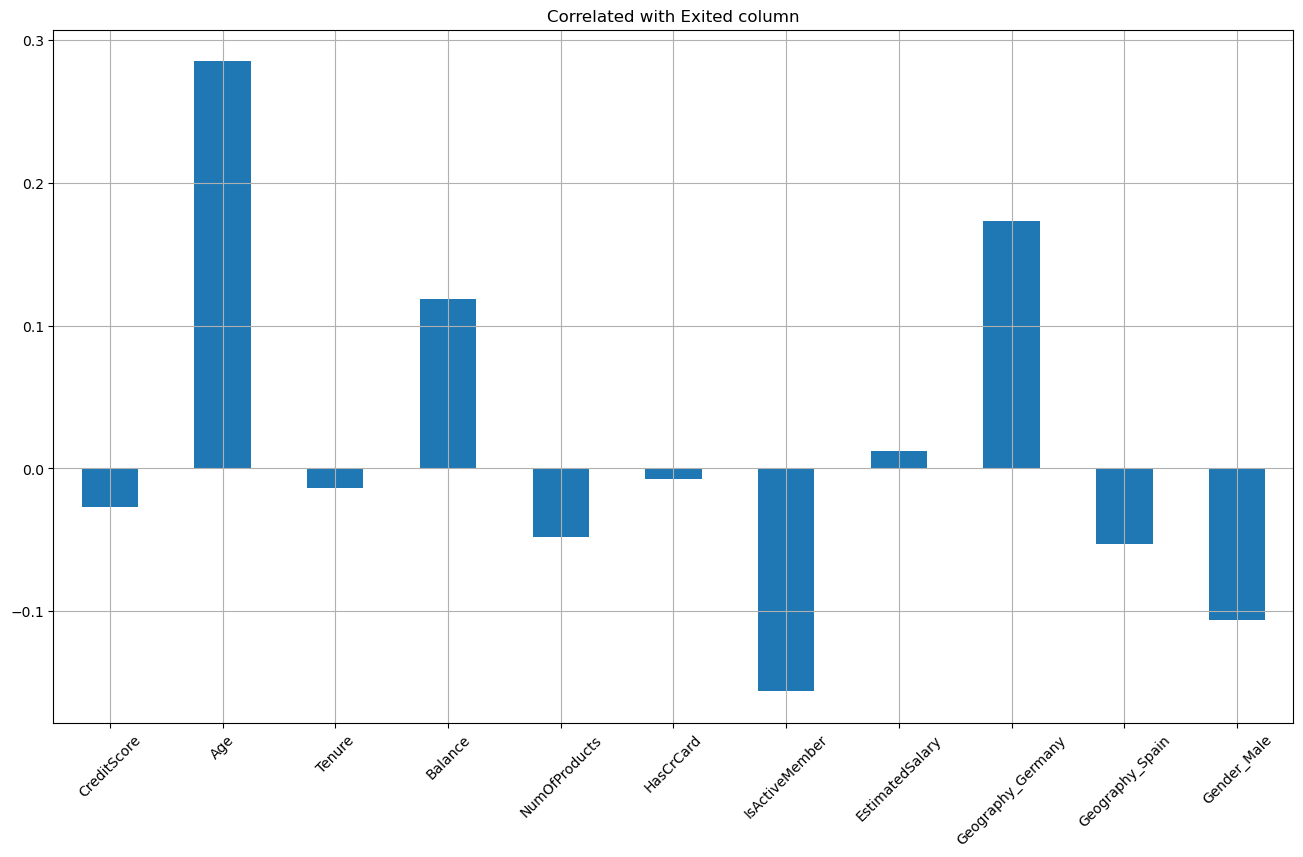

In [29]:
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(16,9),title="Correlated with Exited column", rot=45,grid=True)


#### **Conclusiones preliminares:**

Basándonos en esta gráfica, podemos hacer algunas observaciones preliminares:

- Edad y Balance: A medida que aumenta la edad y el balance de los clientes, parece haber una mayor tendencia a abandonar el banco. Esto podría sugerir que clientes con mayor poder adquisitivo o con una relación más larga con el banco podrían ser más propensos a buscar otras opciones.
- Tenure y Número de Productos: Un mayor "Tenure" (antigüedad) y un mayor "Número de Productos" parecen estar relacionados con una menor probabilidad de salida. Esto podría indicar que los clientes más antiguos y con más productos contratados son más leales al banco.
- Geografía: La variable "Geography" también parece tener un impacto, aunque la interpretación de esta variable requiere un análisis más profundo.

In [30]:
corr=dataset.corr()

<Axes: >

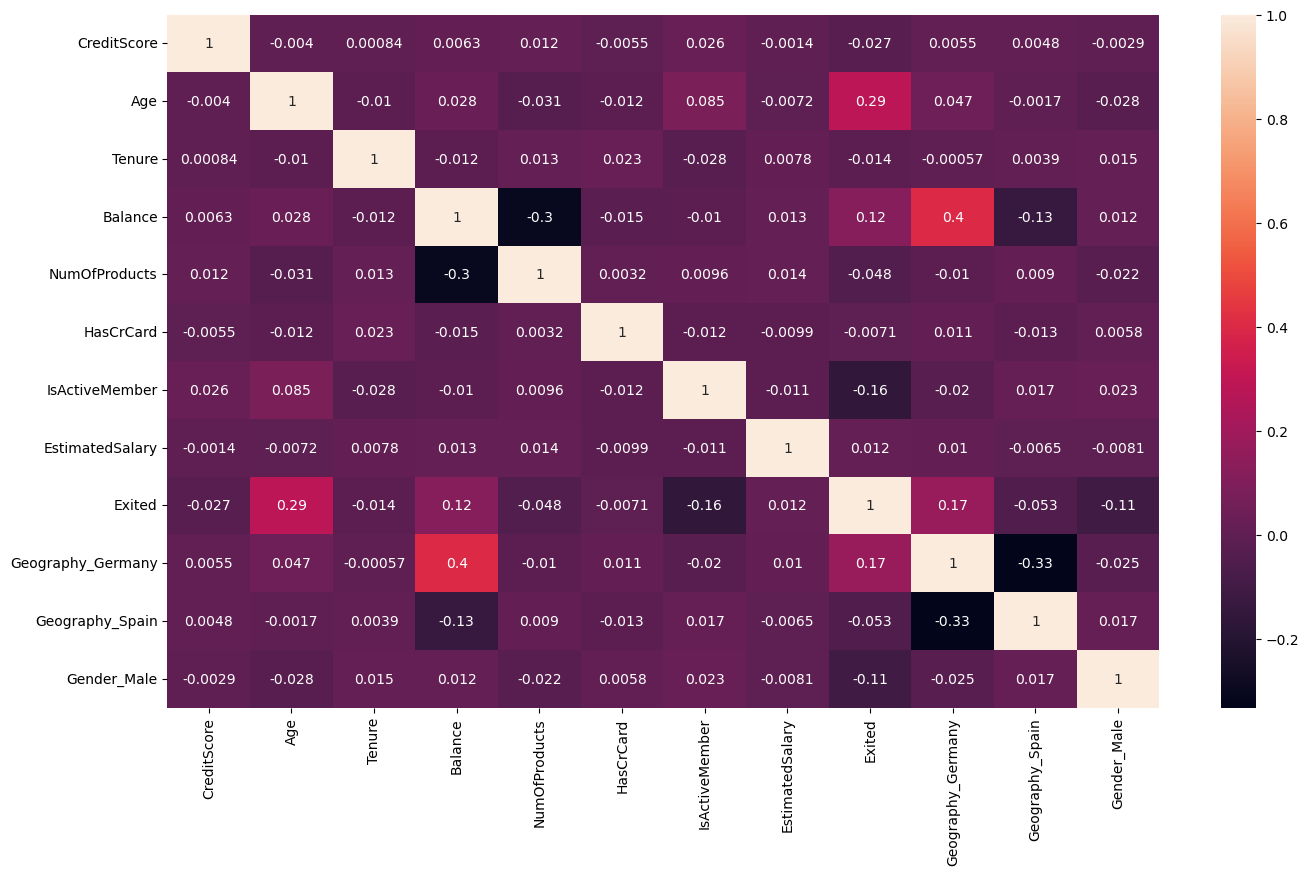

In [31]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## **Entendiendo el Mapa de Calor:**

Un mapa de calor es una herramienta visual para entender las relaciones entre diferentes variables. En este caso, cada celda representa la correlación entre dos variables de tu conjunto de datos sobre clientes bancarios. Los colores más cálidos (rojos) indican una correlación positiva fuerte, mientras que los colores más fríos (azules) indican una correlación negativa fuerte. Los colores cercanos al blanco indican una correlación débil o nula.

Conclusiones Principales:

Basándonos en este mapa de calor, podemos extraer las siguientes conclusiones:

- Edad y Salario: Existe una correlación positiva entre la edad y el salario estimado. Esto es bastante intuitivo, ya que a medida que las personas envejecen, generalmente tienen salarios más altos.
- Balance y Número de Productos: Hay una correlación positiva moderada entre el balance de la cuenta y el número de productos contratados. Esto sugiere que los clientes con mayores saldos tienden a tener más productos asociados a su cuenta.
- Edad y Exited: Una de las relaciones más interesantes es la correlación positiva entre la edad y la probabilidad de que un cliente se vaya del banco. Esto podría indicar que los clientes más jóvenes son más propensos a cambiar de banco, posiblemente en busca de productos y servicios más adaptados a sus necesidades.
- Balance y Exited: También hay una correlación positiva entre el balance y la probabilidad de salida. Esto podría parecer contraintuitivo al principio, pero podría deberse a que los clientes con mayores balances podrían ser más sensibles a pequeñas diferencias en las tasas de interés o comisiones, y por lo tanto más propensos a cambiar de banco si encuentran una oferta más atractiva.
- Geografía y Exited: Los clientes de Alemania parecen tener una probabilidad ligeramente mayor de abandonar el banco en comparación con los clientes de España. Esto podría deberse a factores culturales, económicos o a diferencias en la oferta de productos y servicios en cada país.

Otras Observaciones:

- Correlaciones Débiles: La mayoría de las correlaciones en este mapa de calor son relativamente débiles. Esto indica que aunque hay algunas relaciones entre las variables, ninguna de ellas explica por sí sola una gran proporción de la variabilidad en la probabilidad de salida.
- Variables Categóricas: Las variables categóricas (como Geography y Gender) han sido codificadas de alguna manera para poder calcular las correlaciones. Sin embargo, es importante recordar que las correlaciones con variables categóricas pueden ser más difíciles de interpretar.
- Correlación no implica Causalidad: Aunque el mapa de calor muestra relaciones entre las variables, no podemos concluir que una variable cause un cambio en otra. Por ejemplo, el hecho de que haya una correlación positiva entre la edad y la probabilidad de salida no significa que envejecer haga que los clientes se vayan del banco. Podría haber otros factores subyacentes que influyen en ambas variables.

## **Dividimos los datos para entrenamiento y pruebas**

In [32]:
#Variables independientes, es decir; todas las columnas excepto nuesro target que es Exited
x = dataset.drop(columns='Exited')

#Variables dependientes, solo la clumna Exited
y=dataset['Exited']

In [33]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


In [34]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [37]:
x_train.shape

(8000, 11)

In [38]:
x_test.shape

(2000, 11)

### **Usamos SatandrdScaler**
StandardScaler es una herramienta en el preprocesamiento de datos que sirve para poner todas las características de un conjunto de datos en la misma escala. Esto es fundamental para que los algoritmos de machine learning funcionen correctamente, ya que muchos de ellos asumen que los datos están en una escala similar.

**¿Cómo lo hace?**

- Resta la media: Calcula el promedio de cada característica y lo resta a cada valor.
- Divide por la desviación estándar: Divide cada valor resultante por la desviación estándar de la característica.

**¿Para qué sirve?**

- Mejora el rendimiento de los algoritmos: Muchos algoritmos, como la regresión logística o los KNN, funcionan mejor con datos estandarizados.
- Evita que características con mayor varianza dominen el modelo: Todas las características tienen la misma importancia relativa.
- Facilita la interpretación de los coeficientes: En modelos como la regresión lineal, los coeficientes se vuelven más comparables.

*En resumen, el StandardScaler es como un "igualador" de datos que ayuda a que los algoritmos de machine learning trabajen de manera más eficiente y precisa.*

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [41]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

## Modelo

**Regresion logistica**

## **La regresión logística nos permite:**

- Predecir comportamientos: En este caso, predecir si un cliente se irá o no.
- Identificar factores de riesgo: Entender qué variables influyen más en la decisión de un cliente de irse.
- Tomar decisiones basadas en datos: Utilizar esta información para mejorar nuestros productos y servicios.

In [42]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0).fit(x_train, y_train)

In [43]:
y_pred = clf.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [45]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [47]:
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]], columns=['Model','Accuracy', 'F1', 'Precision', 'Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


### **Entendiendo las Métricas**

Antes de evaluar tu modelo, recapitulemos qué significa cada métrica:

- Accuracy (Precisión): Indica la proporción total de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones.
- F1-Score: Es la media armónica de precisión y recall, proporcionando un equilibrio entre ambos. Un valor F1 alto indica un buen desempeño del modelo.
- Precision: Mide la proporción de predicciones positivas que son realmente positivas. Es decir, de todas las instancias que el modelo clasificó como positivas, ¿cuántas lo eran realmente?
- Recall: Mide la proporción de instancias positivas que el modelo identificó correctamente. Es decir, de todas las instancias positivas reales, ¿cuántas fueron clasificadas correctamente como positivas?

### **Evaluando el Modelo**

**Accuracy:**

Con un valor de 0.811, tu modelo tiene una precisión general del 81.1%. Esto significa que en el 81.1% de los casos, tu modelo está clasificando correctamente si un cliente se va o no. A primera vista, parece un buen resultado.

**F1-Score, Precision y Recall:**

- Sin embargo, al observar el F1-Score, la precisión y el recall, vemos una historia diferente. El F1-Score es relativamente bajo (0.3368), lo que indica un desequilibrio entre precisión y recall.
- La precisión es moderadamente alta (0.5818), lo que significa que cuando el modelo predice que un cliente se irá, suele estar en lo correcto.
- El recall, por otro lado, es muy bajo (0.2370). Esto significa que el modelo está fallando en identificar una gran proporción de clientes que realmente se van.

## **Matriz de confision**

In [48]:
print(confusion_matrix(y_test, y_pred))

[[1526   69]
 [ 309   96]]


### **La matriz tiene esta estructura:**

[[TN, FP]

 [FN, TP]]

Donde:

- TN (True Negatives): Número de casos correctamente clasificados como negativos (clientes que se quedaron y el modelo predijo que se quedarían). En este caso, 1526.
- FP (False Positives): Número de casos incorrectamente clasificados como positivos (clientes que se quedaron pero el modelo predijo que se irían). En este caso, 69.
- FN (False Negatives): Número de casos incorrectamente clasificados como negativos (clientes que se fueron pero el modelo predijo que se quedarían). En este caso, 309.
- TP (True Positives): Número de casos correctamente clasificados como positivos (clientes que se fueron y el modelo predijo que se irían). En este caso, 96.

# **Usemos otro modelo Random Forest**

**Un Random Forest** es como un bosque de árboles de decisión. Cada árbol vota sobre si un cliente se irá o no del banco, basándose en una muestra aleatoria de los datos y un subconjunto aleatorio de las características. Al combinar las decisiones de muchos árboles, se obtiene una predicción más precisa y robusta. Este método es ideal para predecir la churn porque puede manejar datos complejos, identificar las características más importantes y reducir el riesgo de sobreajuste. En el caso de un banco, esto permite identificar a los clientes con mayor probabilidad de abandonar el servicio y tomar medidas para retenerlos.

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

RF_results = pd.DataFrame([['Random Forest Classifier', acc, f1, prec, rec]], columns=['Model','Accuracy', 'F1', 'Precision', 'Recall'])
results = pd.concat([results, RF_results], ignore_index=True)
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest Classifier,0.866,0.611594,0.740351,0.520988
2,Random Forest Classifier,0.866,0.611594,0.740351,0.520988
3,Random Forest Classifier,0.866,0.611594,0.740351,0.520988
4,Random Forest Classifier,0.866,0.611594,0.740351,0.520988


In [57]:
print(confusion_matrix(y_test, y_pred))

[[1521   74]
 [ 194  211]]


### Predecimos una sola observación

In [58]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [59]:
single_obs = [[647, 40, 3, 85000.45, 2, 0, 1, 92013.45, 0, 1, 1]]
clf.predict(scaler.fit_transform(single_obs))

array([0])

#### **el resultado anterior indica que el cliente se quedará en el banco**